In [1]:
push!(LOAD_PATH, "../../lib");

In [2]:
using NaCsCalc.Format: Unc
using PyPlot
using LsqFit

In [3]:
data = readcsv("data/Cs_small_knife_x.csv", header=true)[1]

12×2 Array{Float64,2}:
 5.5   2.2  
 5.0   2.2  
 4.8   2.08 
 4.75  1.89 
 4.7   1.6  
 4.65  1.2  
 4.6   0.78 
 4.55  0.442
 4.53  0.342
 4.5   0.226
 4.45  0.109
 4.4   0.05 

In [4]:
data[:, 1] .= data[:, 1] .* 2.54
# The first few data points includes clipping on the beam from somewhere else.
# Ignore them in the fitting
fitdata = data[2:end, :];

In [5]:
model(x, p) = p[1] .* (erf.((x .- p[2]) ./ p[3] .* sqrt(2)) .+ 1)

model (generic function with 1 method)

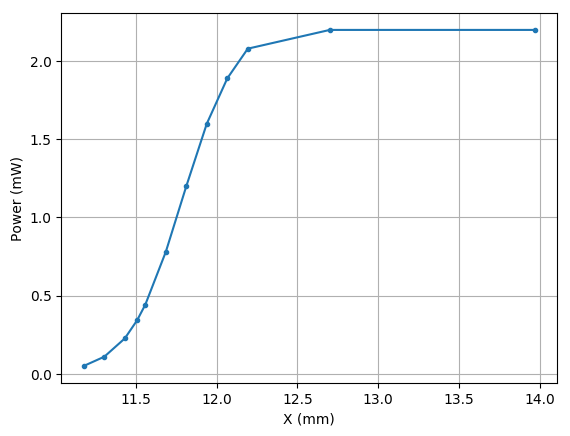

PyObject <matplotlib.text.Text object at 0x7f24aca54128>

In [6]:
plot(data[:, 1], data[:, 2], ".-")
grid()
xlabel("X (mm)")
ylabel("Power (mW)")

In [7]:
fit = curve_fit(model, fitdata[:, 1], fitdata[:, 2], [1.0, 11.5, 0.5])
err = estimate_errors(fit)
@show Unc.(fit.param, err);

Unc.(fit.param, err) = NaCsCalc.Format.Unc{Float64}[1.106(12), 11.7810(67), 0.540(14)]


The beam size is measured 6cm after the collimator.

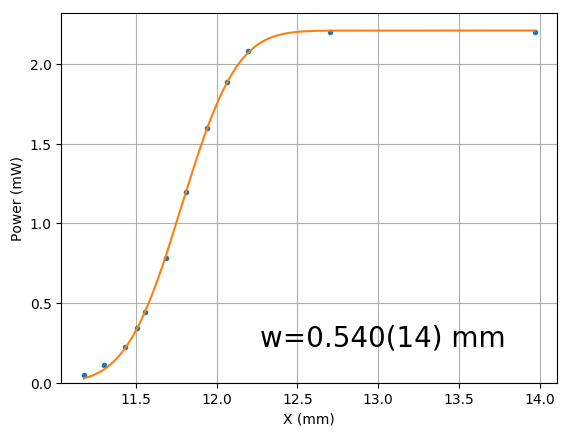

PyObject <matplotlib.text.Annotation object at 0x7f24a4c9ee48>

In [8]:
plot(data[:, 1], data[:, 2], ".")
plotx = linspace(data[1, 1], data[end, 1], 1000)
plot(plotx, model.(plotx, (fit.param,)))
grid()
ylim([0, ylim()[2]])
xlabel("X (mm)")
ylabel("Power (mW)")
annotate("w=$(Unc(fit.param[3], err[3])) mm", xy=(0.4, 0.1), xycoords="axes fraction",
         size=20)